# EmotionalAI: Baseline Modeling

Analysis by Frank Flavell

# Modeling

After addressing the class imbalance, I trained several models using the updated dataset.

### Target
* Emotion: 0: No emotion, 1: Anger, 2: Disgust, 3: Fear, 4: Happiness, 5: Sadness, 6: Surprise


## Table of Contents<span id="0"></span>

1. [**Train/ Test Split & Dummy Classifier**](#1)
<br/><br/>
2. [**Logistic Regression**](#2)
<br/><br/>
3. [**Naive Bayes**](#3)
<br/><br/>
4. [**Support Vector Machine**](#4)
<br/><br/>
5. [**Random Forest**](#5)
<br/><br/>
6. [**Evaluation & Findings**](#6)
    * Class Imbalance
    * Feature Engineering
<br/><br/>
7. [**In-Notebook Demo**](#6)

# Package Import

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Pre-Processing
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer

#Train/Test Split
from sklearn.model_selection import train_test_split

#Modeling Processing Pipeline
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

#Models
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier

#Evaluation
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

# Data Import and Review

In [11]:
df = pd.read_pickle('data/master_under.pickle')

In [12]:
df.head()

,text,emotion
0,You sound relieved.,0
1,You are welcome. Please feel free to ask if yo...,0
2,What should I do with the token?,0
3,Pardon?,0
4,This is a precious opportunity for us and our ...,0


In [13]:
df.shape

(21347, 2)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21347 entries, 0 to 21346
Data columns (total 2 columns):
text       21347 non-null object
emotion    21347 non-null int64
dtypes: int64(1), object(1)
memory usage: 333.7+ KB


# <span id="1"></span>1. Train/ Test Split
#### [Return Contents](#0)

In [15]:
X = df.text
y = df.emotion
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)

In [16]:
emotions = ['No emotion', 'Anger', 'Disgust', 'Fear', 'Happiness', 'Sadness', 'Surprise']

In [106]:
evaluation = pd.DataFrame({'Model': [],
                           'Details':[],
                           'Accuracy':[],
                           'Precision':[],
                           'FP':[],
                           'Recall':[],
                           'FN':[],
                           'F1-Score':[]})

### Dummy Classifiers

In [102]:
all_strategies = ['most_frequent', 'stratified', 'uniform', 'logreg', 'naive bayes', 'random forest', 'SVM']

In [113]:
test_scores

[0.17096018735362997,
 0.1522248243559719,
 0.1451990632318501,
 0.8079625292740047,
 0.7484777517564403,
 0.322248243559719,
 0.7552693208430913]

In [99]:
dc_strategies = ['most_frequent', 'stratified', 'uniform'] 
  
test_scores = [] 
for s in strategies: 
    dclf = DummyClassifier(strategy = s, random_state = 0) 
    dclf.fit(X_train, y_train) 
    score = dclf.score(X_test, y_test) 
    test_scores.append(score)

In [100]:
print(dc_test_scores)

[0.17096018735362997, 0.1522248243559719, 0.1451990632318501]


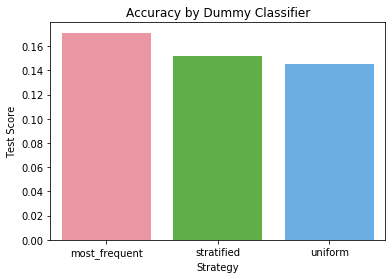

In [125]:
pal = sns.color_palette(("#7449f6", "#ee823e"))
sns.set_palette(pal)
ax = sns.barplot(dc_strategies, dc_test_scores); 
ax.set(xlabel ='Strategy', ylabel ='Test Score', title='Accuracy by Dummy Classifier') 
plt.show()

# <span id="2"></span>2. Logistic Regression
#### [Return Contents](#0)

In [18]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
# INSERT VECTORIZER INSTEAD
from sklearn.metrics import classification_report
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

In [107]:
logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(X_train, y_train)

y_pred_log1 = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_test, y_pred_log1))
#test_scores.append(accuracy_score(y_test, y_pred_log1))
print(classification_report(y_test, y_pred_log1,target_names=emotions))

cm = metrics.confusion_matrix(y_test, y_pred_log1)
acc = float(format(metrics.accuracy_score(y_test, y_pred_log1, sample_weight=None), '.3f'))
prec = float(format(metrics.precision_score(y_test, y_pred_log1, average='macro'),'.3f'))
fp = cm[0,1]
rec = float(format(metrics.recall_score(y_test, y_pred_log1, average='macro'),'.3f'))
fn = cm[1,0]
f1 = float(format(metrics.f1_score(y_test, y_pred_log1, average='macro'),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Logistic Regression-1','text only',acc,prec,fp,rec,fn,f1]
evaluation.sort_values(by = 'F1-Score', ascending=False)


accuracy 0.8079625292740047
              precision    recall  f1-score   support

  No emotion       0.47      0.52      0.50       451
       Anger       0.78      0.76      0.77       744
     Disgust       0.89      0.96      0.92       472
        Fear       0.96      0.99      0.98       678
   Happiness       0.82      0.74      0.78       730
     Sadness       0.87      0.80      0.83       686
    Surprise       0.79      0.85      0.82       509

    accuracy                           0.81      4270
   macro avg       0.80      0.80      0.80      4270
weighted avg       0.81      0.81      0.81      4270



,Model,Details,Accuracy,Precision,FP,Recall,FN,F1-Score
0,Logistic Regression-1,text only,0.808,0.798,56.0,0.804,76.0,0.8


Testing trained model on new inputs.

In [52]:
message = ['I am feeling delight']

In [54]:
pred = logreg.predict(message)

In [57]:
pred[0] == 5

True

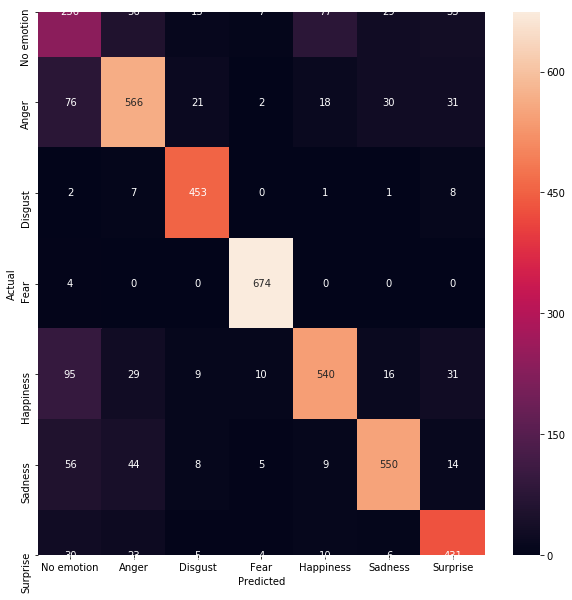

In [108]:
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=emotions, yticklabels=emotions)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# <span id="3"></span>3. Naive Bayes
#### [Return Contents](#0)

In [109]:
nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

y_pred_nb1 = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_test, y_pre_nb1))
test_scores.append(accuracy_score(y_test, y_pre_nb1))
print(classification_report(y_test, y_pred_nb1,target_names=emotions))

cm = metrics.confusion_matrix(y_test, y_pred_nb1)
acc = float(format(metrics.accuracy_score(y_test, y_pred_nb1, sample_weight=None), '.3f'))
prec = float(format(metrics.precision_score(y_test, y_pred_nb1, average='macro'),'.3f'))
fp = cm[0,1]
rec = float(format(metrics.recall_score(y_test, y_pred_nb1, average='macro'),'.3f'))
fn = cm[1,0]
f1 = float(format(metrics.f1_score(y_test, y_pred_nb1, average='macro'),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Naive Bayes-1','text only',acc,prec,fp,rec,fn,f1]
evaluation.sort_values(by = 'F1-Score', ascending=False)

accuracy 0.7484777517564403
              precision    recall  f1-score   support

  No emotion       0.58      0.40      0.47       451
       Anger       0.64      0.83      0.72       744
     Disgust       0.89      0.68      0.77       472
        Fear       0.89      0.92      0.90       678
   Happiness       0.79      0.75      0.77       730
     Sadness       0.71      0.85      0.77       686
    Surprise       0.75      0.64      0.69       509

    accuracy                           0.75      4270
   macro avg       0.75      0.72      0.73      4270
weighted avg       0.75      0.75      0.74      4270



,Model,Details,Accuracy,Precision,FP,Recall,FN,F1-Score
0,Logistic Regression-1,text only,0.808,0.798,56.0,0.804,76.0,0.80
1,Naive Bayes-1,text only,0.748,0.752,94.0,0.723,14.0,0.73


# <span id="4"></span>4. Random Forest
#### [Return Contents](#0)

In [110]:
rdf = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', RandomForestClassifier(n_estimators=100, max_depth= 5)),
               ])
rdf.fit(X_train, y_train)

y_pred_rf1 = rdf.predict(X_test)

print('accuracy %s' % accuracy_score(y_test, y_pred_rf1))
test_scores.append(accuracy_score(y_test, y_pred_rf1))
print(classification_report(y_test, y_pred_rf1,target_names=emotions))

cm = metrics.confusion_matrix(y_test, y_pred_rf1)
acc = float(format(metrics.accuracy_score(y_test, y_pred_rf1, sample_weight=None), '.3f'))
prec = float(format(metrics.precision_score(y_test, y_pred_rf1, average='macro'),'.3f'))
fp = cm[0,1]
rec = float(format(metrics.recall_score(y_test, y_pred_rf1, average='macro'),'.3f'))
fn = cm[1,0]
f1 = float(format(metrics.f1_score(y_test, y_pred_rf1, average='macro'),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Random Forest-1','text only',acc,prec,fp,rec,fn,f1]
evaluation.sort_values(by = 'F1-Score', ascending=False)

accuracy 0.322248243559719
              precision    recall  f1-score   support

  No emotion       0.00      0.00      0.00       451
       Anger       0.53      0.39      0.45       744
     Disgust       0.00      0.00      0.00       472
        Fear       0.98      0.18      0.30       678
   Happiness       0.21      0.96      0.35       730
     Sadness       0.95      0.38      0.54       686
    Surprise       0.83      0.02      0.04       509

    accuracy                           0.32      4270
   macro avg       0.50      0.27      0.24      4270
weighted avg       0.54      0.32      0.28      4270



,Model,Details,Accuracy,Precision,FP,Recall,FN,F1-Score
0,Logistic Regression-1,text only,0.808,0.798,56.0,0.804,76.0,0.800
1,Naive Bayes-1,text only,0.748,0.752,94.0,0.723,14.0,0.730
2,Random Forest-1,text only,0.322,0.500,40.0,0.274,0.0,0.238


# <span id="5"></span>5. Support Vector Machine
#### [Return Contents](#0)

In [111]:
sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)

y_pred_svm1 = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_test, y_pred_svm1))
test_scores.append(accuracy_score(y_test, y_pred_svm1))
print(classification_report(y_test, y_pred_svm1,target_names=emotions))

cm = metrics.confusion_matrix(y_test, y_pred_svm1)
acc = float(format(metrics.accuracy_score(y_test, y_pred_svm1, sample_weight=None), '.3f'))
prec = float(format(metrics.precision_score(y_test, y_pred_svm1, average='macro'),'.3f'))
fp = cm[0,1]
rec = float(format(metrics.recall_score(y_test, y_pred_svm1, average='macro'),'.3f'))
fn = cm[1,0]
f1 = float(format(metrics.f1_score(y_test, y_pred_svm1, average='macro'),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['SVM-1','text only',acc,prec,fp,rec,fn,f1]
evaluation.sort_values(by = 'F1-Score', ascending=False)

accuracy 0.7552693208430913
              precision    recall  f1-score   support

  No emotion       0.60      0.33      0.43       451
       Anger       0.79      0.68      0.73       744
     Disgust       0.77      0.79      0.78       472
        Fear       0.81      0.94      0.87       678
   Happiness       0.74      0.82      0.78       730
     Sadness       0.82      0.83      0.82       686
    Surprise       0.65      0.77      0.70       509

    accuracy                           0.76      4270
   macro avg       0.74      0.74      0.73      4270
weighted avg       0.75      0.76      0.75      4270



,Model,Details,Accuracy,Precision,FP,Recall,FN,F1-Score
0,Logistic Regression-1,text only,0.808,0.798,56.0,0.804,76.0,0.800
3,SVM-1,text only,0.755,0.740,48.0,0.737,23.0,0.731
1,Naive Bayes-1,text only,0.748,0.752,94.0,0.723,14.0,0.730
2,Random Forest-1,text only,0.322,0.500,40.0,0.274,0.0,0.238


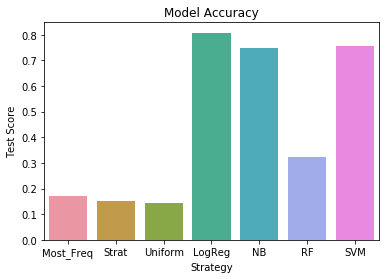

In [127]:
# all_strategies = ['Most_Freq', 'Strat', 'Uniform', 'LogReg', 'NB', 'RF', 'SVM']
pal = sns.color_palette(("#7449f6", "#ee823e"))
sns.set_palette(pal)
ax = sns.barplot(['Most_Freq', 'Strat', 'Uniform', 'LogReg', 'NB', 'RF', 'SVM'], test_scores); 
ax.set(xlabel ='Strategy', ylabel ='Test Score', title='Model Accuracy') 
plt.show()

# <span id="6"></span>6. Evaluation & Findings
#### [Return Contents](#0)

### Evaluation

The best model was a logistic regression model that achieved 80% accuracy with an F1-Score of 0.8.  I focused primarily on the F1-Score because the cost of a false negative and a false positive are essentially the same - both result in a false prediction for the user.  I also focused on accuracy because I want to see how overall effective the model is at outputting an accurate prediction while understanding that the accuracy of predictions vary by emotion class.


### Findings

The goal here is to build a model that's good enough to put into production for a beta phase where I can test the model within a chatbot framework and gather more and more user data to train new models.

The model does well as classifying utterances containing emotion keywords like "down" for sad.

The model also does relatively well on short utterances that don't contain keywords.

The model fails when handling large utterances that contain complex sentence structure and mention of several different emotions.  My hope is that the emotion score feature could help to improve the model's effectiveness in this regard.

# <span id="7"></span>7. In-Notebook Demo
#### [Return Contents](#0)

I built a function that takes in a string and outputs a prediction and checks for validation.

In [79]:
def emotion_ai(response):
#     reponse = raw_input("Hi! How're you feeling today?")
#     cleaned = pipeline(response)
    emotion = logreg.predict([response])
    if emotion[0] == 0:
        print('\n')
        print("Hmm...tell me more.\n")
    elif emotion[0] == 1:
        print('\n')
        print("I'm sorry you're feeling angry.\n")
        val = input("Is that correct?\n\n")
    elif emotion[0] == 2:
        print('\n')
        print("I'm sorry you're feeling disgusted.\n")
        val = input("Is that correct?\n\n")
    elif emotion[0] == 3:
        print('\n')
        print("I'm sorry you're feeling scared.\n")
        val = input("Is that correct?\n\n")
    elif emotion[0] == 4:
        print('\n')
        print("That's great you're feeling happy.\n")
        val = input("Is that correct?\n\n")
    elif emotion[0] == 5:
        print('\n')
        print("I'm sorry you're feeling sad.\n")
        val = input("Is that correct?\n\n")
    elif emotion[0] == 6:
        print('\n')
        print("You're feeling surprised.\n")
        val = input("Is that correct?\n\n")

In [90]:
message = input("Hi!  How're you feeling today?\n\n")
emotion_ai(message)

Hi!  How're you feeling today?

All my friends are at the movies and they didn't invite me.


I'm sorry you're feeling sad.

Is that correct?

Yes.
